# ANALYZING CRIME INCIDENTS IN BOSTON FROM 2013 TO 2016

In [1]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
from bokeh.plotting import *
from bokeh.models import HoverTool

In [2]:
df1=pd.read_csv("../data/ProcessedData/merged_crime_data_2012_to_2017.csv") #reading csv file from processed data

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.head(2)

,INCIDENT_NUM,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,STREET,LOCATION
0,120420285,RESIDENTIAL BURGLARY,D4,2012-07-08T06:00:00.000,No,2012,7,Sunday,ABERDEEN ST,"{'type': 'Point', 'coordinates': [-71.103795, ..."
1,120419202,AGGRAVATED ASSAULT,B2,2012-07-08T06:03:00.000,Yes,2012,7,Sunday,HOWARD AV,"{'type': 'Point', 'coordinates': [-71.074585, ..."


# Analysis- If we check the crime rate of last 4 years.

In [4]:
df2=df1.groupby('YEAR').INCIDENT_NUM.count()

In [5]:
df2=df2.reset_index(drop=False)

In [6]:
df_A=df2.ix[1:4,:].reset_index(drop=True)
df_A.to_csv('../analysis/analysis1/CrimeIncidents_2013_to_2016.csv', index=False)

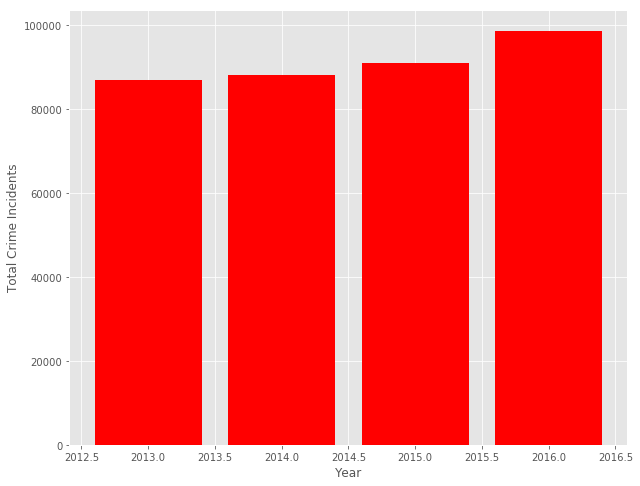

In [7]:
plt.figure(figsize=(10,8))
pt=plt.bar(df_A.YEAR,df_A.INCIDENT_NUM,color='red')
plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.show()

# Conclusion- There is no steep but subtle rise in crime rate in last 4 years.

# Analysis- Day of the week when the crime had happened mostly

In [8]:
# sorting crime number by week
df4=df1.groupby('DAY_OF_WEEK').INCIDENT_NUM.count()
df4=df4.reset_index(drop=False)
df4=df4.ix[(1,5,6,4,0,2,3),:]
df4=df4.reset_index(drop=True)
df4.head(7)

,DAY_OF_WEEK,INCIDENT_NUM
0,Monday,62415
1,Tuesday,62205
2,Wednesday,62762
3,Thursday,62882
4,Friday,67339
5,Saturday,61815
6,Sunday,55349


In [9]:
df4.to_csv('../analysis/analysis1/CrimeIncidents_weekwise.csv', index=False) #export to csv

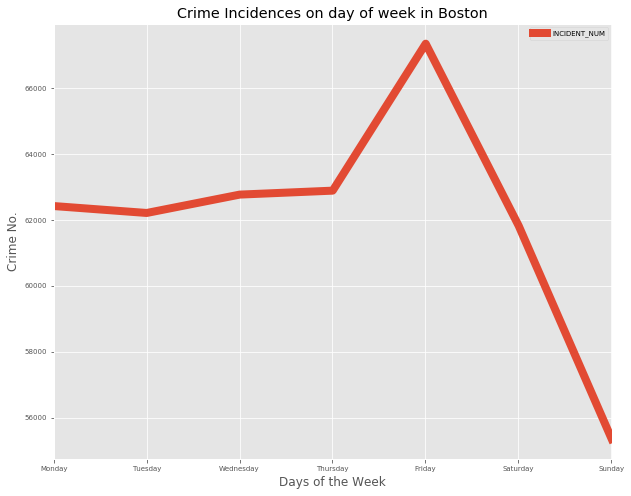

In [10]:
#plot of crime incidents against week days

plt.figure(figsize=(10,8))
pt=df4['INCIDENT_NUM'].plot(kind='line', title='Crime Incidences on day of week in Boston',fontsize=7)
pt.set_ylabel('Crime No.')
pt.set_xlabel('Days of the Week')
start, end = pt.get_xlim()
pt.set_xticks(np.arange(start, end, .999))
pt.set_xticklabels(df4.DAY_OF_WEEK)
pt.lines[-1].set_linewidth(8)
pt.legend(fontsize=7)
plt.show()

# Conclusion: Most of the crime happened on Friday.
- Reason could be anything related with intoxication and resulted behaviour like vandalism but we cannot deduce the direct conclusion.
- Need to do further analysis to check the charges impressed upon the convict by police dept.
- We check the number of crime associated with drug, drink charges on day of the week.
- Note: A person can be charged with multiple complaints

# Analysis- Continue with above what cause more crime on Friday?

In [11]:
#Find out the crime like Drug Charges/PubDrink/Vandalism on week basis

df5=df1[(df1.OFFENSE_DESCRIPTION.apply(lambda x: 'DRUG CHARGES'  in x)) | 
       (df1.OFFENSE_DESCRIPTION.apply(lambda x: 'PubDrink'  in x)) |
       (df1.OFFENSE_DESCRIPTION.apply(lambda x: 'VANDALISM'  in x)) ]

In [12]:
df6=df5.groupby('DAY_OF_WEEK').INCIDENT_NUM.count()
df6=df6.reset_index(drop=False)
df6=df6.ix[(1,5,6,4,0,2,3),:]
df6=df6.reset_index(drop=True)
df6.columns=['DAY_OF_WEEK','DrugCharges/PubDrink/Vandalism_INCIDENT_NUM']
df6.head(7)

,DAY_OF_WEEK,DrugCharges/PubDrink/Vandalism_INCIDENT_NUM
0,Monday,5050
1,Tuesday,5056
2,Wednesday,5206
3,Thursday,4997
4,Friday,5505
5,Saturday,5124
6,Sunday,4519


In [13]:
df6.to_csv('../analysis/analysis1/DrugCharges_PubDrink_Vandalism_CrimeIncidents_weekwise.csv', index=False) #export to csv

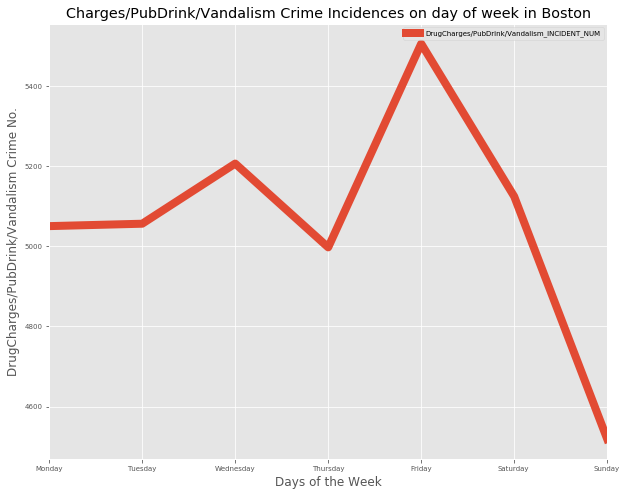

In [14]:
#plot of Charges/PubDrink/Vandalism crime incidents against week days

plt.figure(figsize=(10,8))
pt=df6['DrugCharges/PubDrink/Vandalism_INCIDENT_NUM'].plot(kind='line', title='Charges/PubDrink/Vandalism Crime Incidences on day of week in Boston',fontsize=7)
pt.set_ylabel('DrugCharges/PubDrink/Vandalism Crime No.')
pt.set_xlabel('Days of the Week')
start, end = pt.get_xlim()
pt.set_xticks(np.arange(start, end, .999))
pt.set_xticklabels(df6.DAY_OF_WEEK)
pt.lines[-1].set_linewidth(8)
pt.legend(fontsize=7)
plt.show()

# Conclusion: We can see that Friday intoxication(drugs/drinks) and result vandalism is one of the factor which increase the crime on Friday.
-Note: There can be other factors but with database this information we can deduce.

In [15]:
# Infact there is direct link between alcohal, drugs abuse and vandalism

In [16]:
# df7=df1[(df1.OFFENSE_DESCRIPTION.apply(lambda x: 'DRUG CHARGES'  in x)) | 
#        (df1.OFFENSE_DESCRIPTION.apply(lambda x: 'PubDrink'  in x))]

In [17]:
# df8=df7.groupby('DAY_OF_WEEK').INCIDENT_NUM.count()
# df8=df8.reset_index(drop=False)
# #df4=df4.sort_values(by='DAY_OF_WEEK',ascending=True)
# df8=df8.ix[(1,5,6,4,0,2,3),:]
# df8.head(7)

In [18]:
# df9=df1[(df1.OFFENSE_DESCRIPTION.apply(lambda x: 'VANDALISM'  in x))]

In [19]:
# df10=df9.groupby('DAY_OF_WEEK').INCIDENT_NUM.count()
# df10=df10.reset_index(drop=False)
# #df4=df4.sort_values(by='DAY_OF_WEEK',ascending=True)
# df10=df10.ix[(1,5,6,4,0,2,3),:]
# df10.head(7)

In [20]:
# df3=df1.groupby(['YEAR','MONTH']).INCIDENT_NUM.count()
# df3=df3.reset_index(inplace=False)

In [21]:
##filtering out 2012 and 2017 from analysis
# df3 = df3[df3.YEAR!=(2012)]
# df3 = df3[df3.YEAR!=(2017)]
# df3.reset_index(drop=True)
# df3.head()

In [22]:
# df1['DATE']=df1.OCCURRED_ON_DATE.apply(lambda x: x.split('T')[0])

In [23]:
# import pandas as pd
# from bokeh.charts import TimeSeries, output_file, show

# AAPL = df1[df1.INCIDENT_NUM]

# output_file("timeseries.html")

# data = dict(AAPL, df1[df1.DATE])

# p = TimeSeries(data, index='Date', title="APPL", ylabel='Stock Prices')

# show(p)

In [24]:
# plt.figure(figsize=(10,8))
# pt=plt.plot(df3.YEAR,df3.INCIDENT_NUM,color='Blue')
# plt.show()

#weekwise

# pt=df3['INCIDENT_NUM'].plot(kind='line', title='Crime in Boston',fontsize=7)
# pt.set_ylabel('Crime Incidences')
# pt.legend(fontsize=7)
# pt.set
# plt.show()